# Customer Segmentation

In this project, our goal is to find different groups of customer based on their age , spending score and annual income
We will use KMeans method to cluster the customers

## Importing necessary libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Loading the data

In [36]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Preprocessing

"Customer ID" is not a significant feature
So we'll remove it

In [38]:
data.drop(["CustomerID"], axis=1, inplace=True)

In [39]:
data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

It seems like we don't have any missing values

In [40]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 16.9 KB


## Exploratory Data Analysis

### Age

<Axes: xlabel='Gender', ylabel='count'>

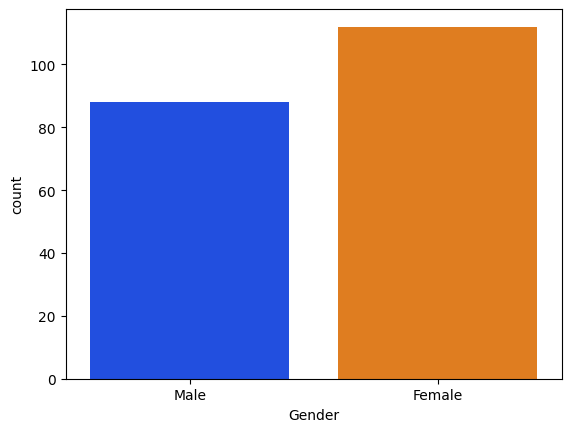

In [41]:
sns.countplot(data=data, x="Gender")

It seems there are more "Female" customers than "Male" customers

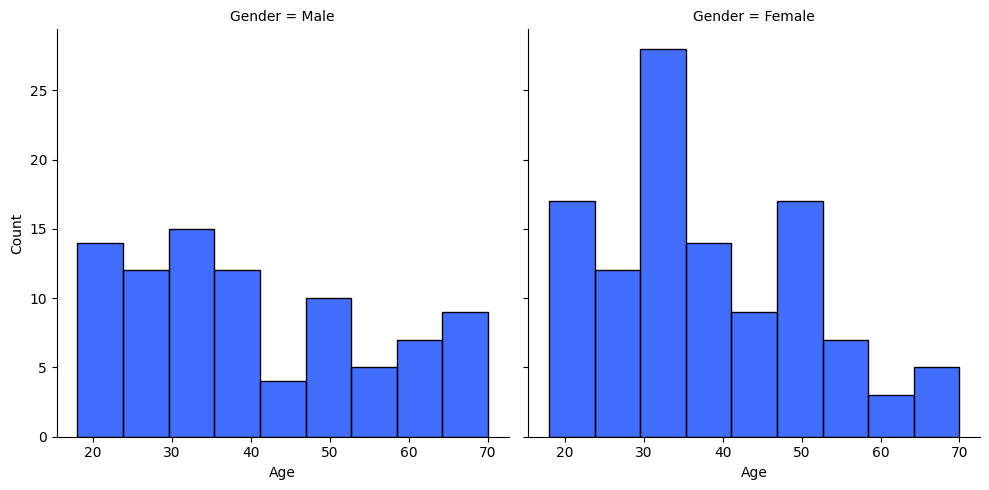

In [42]:
sns.displot(data=data, x="Age", col="Gender")

There are many "Female" customers between the age from "30-35"

### Spending Score

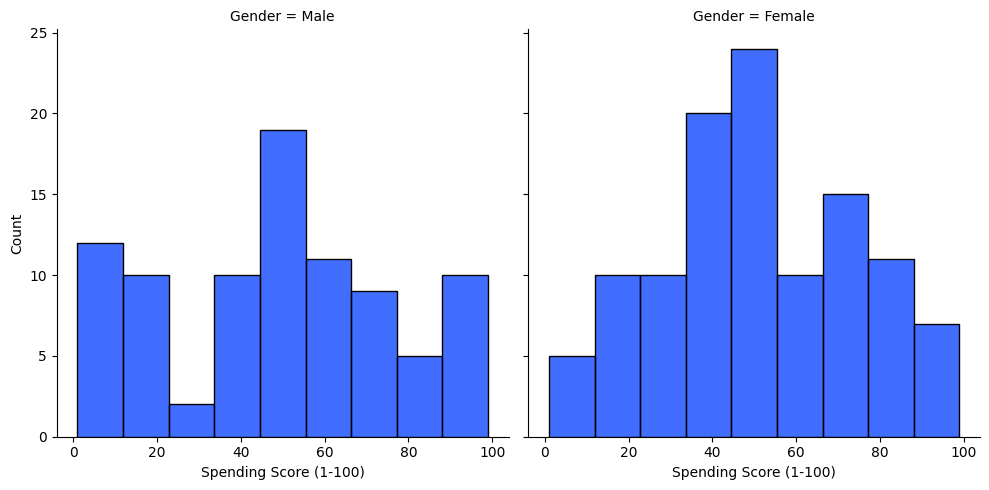

In [43]:
sns.displot(data=data, x=data["Spending Score (1-100)"], col="Gender")

"Male" customers from age "20-30" has lowest spending score

### Income

In [44]:
data.groupby(["Gender"]).agg(Average_Spending=("Spending Score (1-100)", "mean"))

,Average_Spending
Gender,
Female,51.526786
Male,48.511364


In [45]:
data.groupby("Gender").agg(Average_Income=("Annual Income (k$)", "mean"))

,Average_Income
Gender,
Female,59.250000
Male,62.227273


Even though "Male" has more average income they spend less money

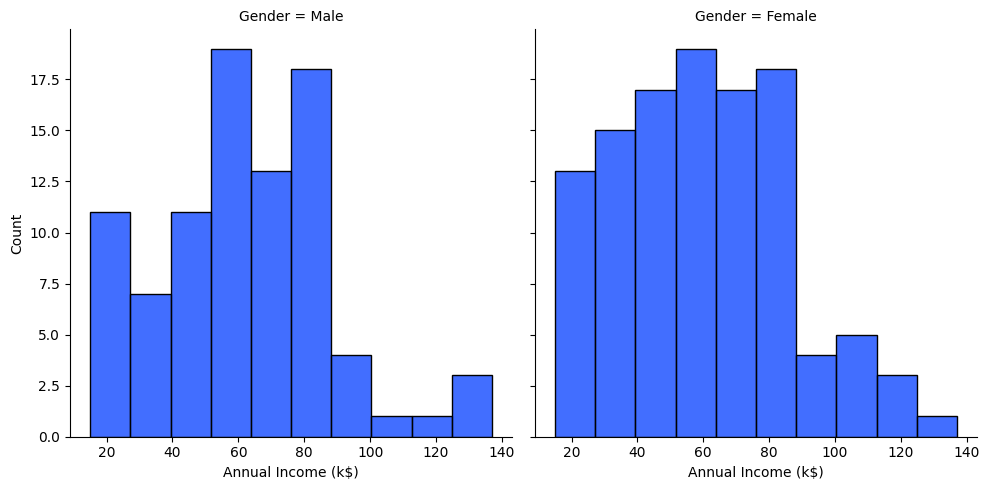

In [46]:
sns.displot(data=data, x=data["Annual Income (k$)"], col="Gender")

###  Age and Income

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

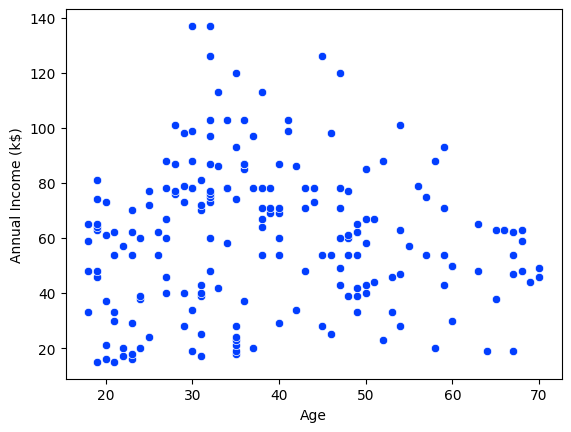

In [47]:
sns.scatterplot(data=data, x=data["Age"], y=data["Annual Income (k$)"])

People with age less than 30 and greater than 60 has low "Annual Income"

### Age and Spending Score

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

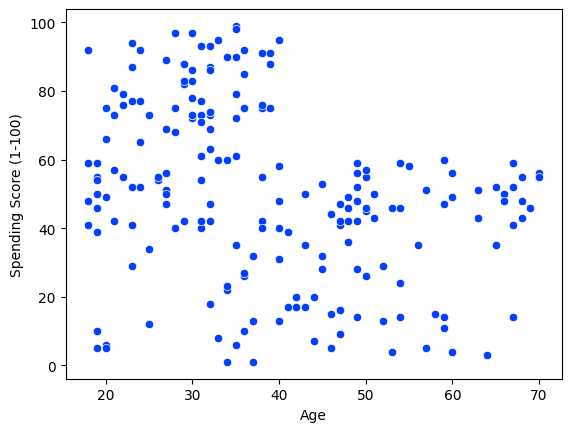

In [48]:
sns.scatterplot(data=data, x=data["Age"], y=data["Spending Score (1-100)"])

"Age" above 40 spend very less

## Creating the model

### Scaling
To give every feature the same significance we scale the data before training the model

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [50]:
data_new = data.iloc[:, [2, 3]]

In [51]:
scaler.fit(data_new)

StandardScaler()

In [52]:
data_scaled = scaler.transform(data_new)

### Elbow Method
In KMeans clustering we need to select optimal no of clusters
We use elbow method to select optimal no of clusters

In [53]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

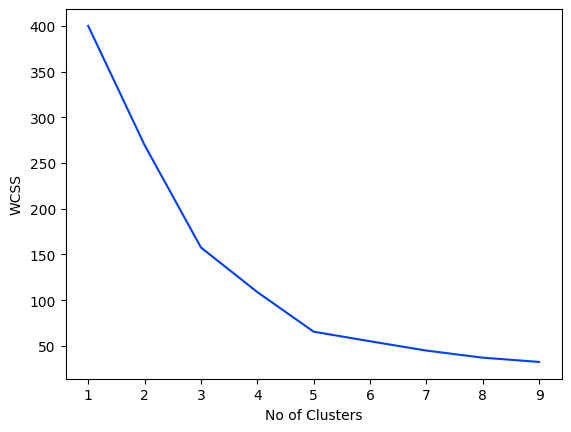

In [54]:
sns.lineplot(x=range(1, 10), y=wcss)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")

We will consider 5 as optimal clusters

In [59]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(data_new)
data_new["Clusters"] = clusters
data_new.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-59-9673dcf5affe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["Clusters"]=clusters


,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


## Visualizing the Clusters

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

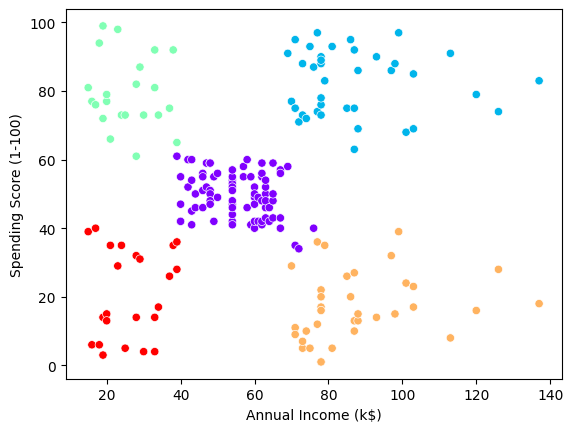

In [61]:
sns.scatterplot(data=data_new, x=data_new["Annual Income (k$)"], y=data_new["Spending Score (1-100)"],
                c=data_new["Clusters"], cmap="rainbow")

### From this we can say there are 5 types of people
1 . Green -> Low Income & High Spender
2 . Purple-> Mid Income & Mid Spender
3 . Red -> Low Income & Low Spender
4 . Orange -> High Income & Low Spender
5 . Blue -> High Income & High Spender